In [1]:
# Import a few useful packages for our test.

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Import the LocalOutlierFactor class from our outliers package

from outliers.local_outlier_factor import LocalOutlierFactor

In [3]:
# Create a local outlier factor object.

lof = LocalOutlierFactor()

In [4]:
# Check that we are catching certain basic errors.

# Empty array
X = np.array([])

lof.fit(X)

# Another empty array
X = np.array([[],[]])

lof.fit(X)

# Not a numpy array
X = [1, 2, 3, 7, 8, 9.1]

lof.fit(X)

The 'fit' operation failed.
The numpy array 'X' should not be empty.
The 'fit' operation failed.
The numpy array 'X' should not be empty.
The 'fit' operation failed.
The input 'X' should be a numpy array.


In [8]:
# Look at an example of k-neighborhoods. Because of the way the k-neighborhood is defined in the original paper by
# Breunig et al on the local outlier factor algorithm, it is possible for the k-neighborhood of a point to contain
# more than k points. We show an example here and refer readers to the original paper if they want to learn more about this.

X = np.array([1.5, 2, 3, 3.5, 4.1, 5, 9])
lof.fit(X)

# Find the 3-neighborhood of the point 3.5 (whose index is i = 3). The 3-neighborhood actually contains *four* points because
# at the third nearest neighbor there is a tie between the points 2 and 5, which are equidistant from 3.5. Note also
# that the entries of 'distances' are stored in heap order.

neighbors, distances = lof.get_neighborhood(3, 3)

print("Indices of members of the 3-neighborhood of 3.5: ", neighbors)
print("Distances of members of the 3-neighborhood of 3.5 from 3.5: ", distances)

Indices of members of the 3-neighborhood of 3.5:  [5 1 4 2]
Distances of members of the 3-neighborhood of 3.5 from 3.5:  [1.5 1.5 0.6 0.5]


In [11]:
# Look at local outlier factors for a simple example data set. This data set has one cluster 1, 2, 3, 4 then two random points 
# 9 and 13, and then a much tighter cluster 30, 30.1, 30.2, 30.3. 

X = np.array([1, 2, 3, 4, 9, 13, 30, 30.1, 30.2, 30.3])

# Let's see what the local outlier factors are for this data set. We will use the 3-neighborhood of each
# point (so k = 3). 
lof.fit(X)
z = lof.get_LOF(3)
print(z)

# We see that points 9 and 13 have the local outlier factors, since they are furthest from both clusters and since we have
# chosen a low number of neighbors to work with (k = 3).

[[0.91666667]
 [1.0952381 ]
 [1.0952381 ]
 [0.91666667]
 [2.155     ]
 [2.62896825]
 [0.91666667]
 [1.0952381 ]
 [1.0952381 ]
 [0.91666667]]


In [12]:
# Next, we'll generate a data set of 200 points drawn from a two-dimensional standard normal distribution.

np.random.seed(1)
X = np.random.randn(200, 2)

# Fit lof to this new data set
lof.fit(X)

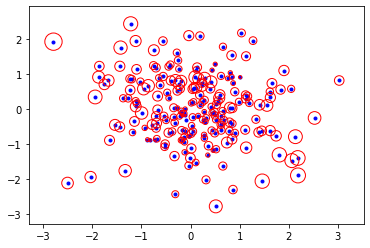

In [14]:
# Compute local outlier factor with 5-neighborhood. 
z = lof.get_LOF(5)

# Make a plot to visualize the local outlier factors of each point. We represent each point with a blue dot and
# the size of the local outlier factor of a data point is represented by the radius of a red circle around that point.

radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 1].min() - ep
y_max = X[:, 1].max() + ep

plt.scatter(X[:, 0], X[:, 1], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 1], s = 300 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

# It looks OK but we probably need to include more neighbors of each point so that the points near the mean of the
# distribution have lower local outlier factors.

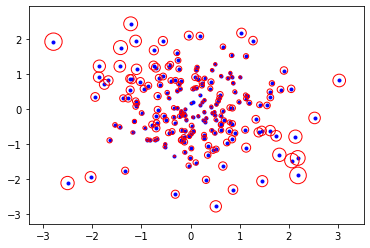

In [16]:
# Compute local outlier factor with 20-neighborhood. 
z = lof.get_LOF(20)

# Make a plot to visualize the local outlier factors of each point. We represent each point with a blue dot and
# the size of the local outlier factor of a data point is represented by the radius of a red circle around that point.

radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 1].min() - ep
y_max = X[:, 1].max() + ep

plt.scatter(X[:, 0], X[:, 1], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 1], s = 300 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

# This is definitely looks better than the case with the 5-neighborhood.

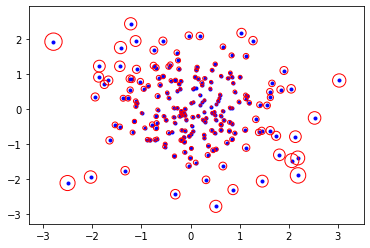

In [17]:
# Compute local outlier factor once more with 40-neighborhood. 
z = lof.get_LOF(40)

# Make a plot to visualize the local outlier factors of each point. We represent each point with a blue dot and
# the size of the local outlier factor of a data point is represented by the radius of a red circle around that point.

radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 1].min() - ep
y_max = X[:, 1].max() + ep

plt.scatter(X[:, 0], X[:, 1], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 1], s = 300 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

# This looks very nice and only the points furthest from the mean have large circles around them. k = 40 seems to
# be a good neighborhood size for this data set.

In [19]:
# Let's do a timing test on a larger data set. We will draw 10000 points from a five-dimensional standard normal distribution
# and compute the local outlier factors for these points using their 30-neighborhood (k = 30). We will time
# the fit operation (which constructs a ball tree data structure for the input data), and time the operation to
# compute the local outlier factors (which involves the search for the k-neighborhood of every point in the data set).

X = np.random.randn(10000, 5)

tic = time.perf_counter()

lof.fit(X)

toc = time.perf_counter()

z = lof.get_LOF(30)

tac = time.perf_counter()

print("Time for fit operation (time to build the ball tree) = ", toc - tic)
print("Time for local outlier factor calculation = ", tac - toc)

# The local outlier factor calculation takes under a minute, which seems reasonable given the amount of calculation that
# needs to be done. It seems that the ball tree data structure is indeed speeding up the nearest neighbor search. 

Time for fit operation (time to build the ball tree) =  1.782839899999999
Time for local outlier factor calculation =  53.036893299999974
